In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mrobotics.piecewise.cubic_onepiece import spline_2d_onepiece

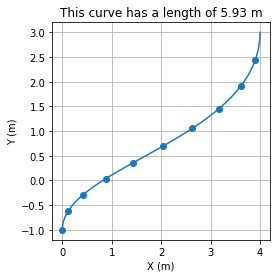

In [2]:
p0 = [0,-1.0]
v0 = [0, 3]
p1 = [4,3]
v1 = [0,5.0]
t0, t1 = 0.2, 1.5 # larger time gap leads to more bendy curve...
my_curve = spline_2d_onepiece(t0=t0, t1=t1)
my_curve.fit_pos_vel_ends(p0, v0 ,p1, v1)

_, ax = plt.subplots()
my_curve.vis_curve(ax=ax, marker='o', markevery=10)
ax.set_aspect('equal')
ax.grid('major')
ax.set_title(f'This curve has a length of {my_curve.calc_arc_length():.2f} m')
plt.show()

## More validation

In [3]:
my_curve.normalize_parameter(np.linspace(t0,t1,10))

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [4]:
my_curve.coeff

array([[ 0. , -1. ],
       [ 0. ,  3.9],
       [12. , -2.3],
       [-8. ,  2.4]])

### some valdiation of the tangent vector method?

In [5]:
num_samples = 5+1 # to exaggrate the effect
t_eval = np.linspace(t0,t1, num_samples)
velocity = my_curve.get_tang(t_eval)
delta_t = t_eval[1]-t_eval[0]
xy_by_integration = np.zeros((num_samples,2))
xy_by_integration[0] = p0
for i in range(1, num_samples): 
    xy_by_integration[i] = xy_by_integration[i-1] + 0.5*(velocity[i-1]+velocity[i])*delta_t

In [6]:
t_eval

array([0.2 , 0.46, 0.72, 0.98, 1.24, 1.5 ])

In [7]:
velocity[:5]

array([[0.        , 3.        ],
       [2.95384615, 2.51384615],
       [4.43076923, 2.47076923],
       [4.43076923, 2.87076923],
       [2.95384615, 3.71384615]])

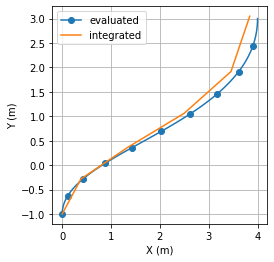

In [8]:
_, ax = plt.subplots()
my_curve.vis_curve(ax=ax, marker='o', markevery=10, label="evaluated")
ax.plot(*xy_by_integration.T, label="integrated")
ax.set_aspect('equal')
ax.grid('major')
ax.legend()
plt.axis()
plt.show()